<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/contoh_perhitungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contoh Perhitungan Transfer Function/Fungsi Alih MK SISTEM KENDALI ##

### Pemodelan Pada Rangkaian Listrik ###

Pelajari file tersebut: <B>[my link](file:///RLCTF.pdf)</B>

<img src="https://github.com/hydekage/Sistem-Automasi/blob/master/img/circuit.jpg?raw=1">
Pada gambar diatas, bagaimana cara kita memodelkan teganan pada beban $R$ ($V_R$)?
<BR>Berdasarkan hukum Ohm: $V=iR$</BR>
<BR>Berdasarkan hukum Faraday: $V_L=L\frac{d_i}{dt}$
<BR>Berdasarkan hukum Kirchoff:$V_s=V_r+V_L$ </BR>

Diketahui:
$${A} = \begin{bmatrix} {0} & \frac{1}{C}\\ -\frac{1}{C} & -\frac{R}{L}\end{bmatrix}$$
$${B} = \begin{bmatrix} {0}\\{\frac{1}{L}}\end{bmatrix}$$
$${C} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}$$
$${D} = 0 $$
Hitung:
$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$



In [16]:
import sympy as sp
import numpy as np
C,L, R,omega, f = sp.symbols(r'C,L,R,omega,f')

In [3]:
i, vs, t = sp.symbols('i,V_s, t')
id = (sp.Function('i')(t).diff(t))
vr = i*R
print("Persamaan V_r:")
display(vr)
vl = L*id
print("Persamaan V_L:")
display(vl)
EQ = -vs+vr+vl
print("Persamaan V_L+V_r-Vs=0:")
display(EQ)

Persamaan V_r:


R*i

Persamaan V_L:


L*Derivative(i(t), t)

Persamaan V_L+V_r-Vs=0:


L*Derivative(i(t), t) + R*i - V_s

In [4]:
eqsolve = sp.solve(EQ,id)
print(eqsolve)
display(eqsolve[0])
display(1/C)

[(-R*i + V_s)/L]


(-R*i + V_s)/L

1/C

In [5]:
A_Row_1 = (0,1/C)
A_Row_2 = (-1/C,-R/L)
A  = sp.Matrix([A_Row_1,A_Row_2])
display('Matrix A:',A)
print("\n")
B_Row_1 = (0)
B_Row_2 = (1/L)
B = sp.Matrix([B_Row_1,B_Row_2])
display('Matrix B:',B)
C_Row_1 = (1,0)
C_Row_2 = (0,1)
C_matrix = sp.Matrix([C_Row_1,C_Row_2])
display('Matrix C:',C_matrix)

'Matrix A:'

Matrix([
[   0,  1/C],
[-1/C, -R/L]])

'Matrix B:'

Matrix([
[  0],
[1/L]])

'Matrix C:'

Matrix([
[1, 0],
[0, 1]])

Masukkan ke Rumus:

$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$

In [6]:
s = sp.Symbol('s')
I = sp.eye(A.shape[0])
display(I)
inv_M=(I*s - A).inv()
display(inv_M)
TFL = C_matrix*inv_M*B
display("Transfer Function  didapatkan:",TFL)

Matrix([
[1, 0],
[0, 1]])

Matrix([
[(C**2*L*s + C**2*R)/(C**2*L*s**2 + C**2*R*s + L),      C*L/(C**2*L*s**2 + C**2*R*s + L)],
[               -C*L/(C**2*L*s**2 + C**2*R*s + L), C**2*L*s/(C**2*L*s**2 + C**2*R*s + L)]])

'Transfer Function  didapatkan:'

Matrix([
[     C/(C**2*L*s**2 + C**2*R*s + L)],
[C**2*s/(C**2*L*s**2 + C**2*R*s + L)]])

In [36]:
display(TFL[1])

C**2*s/(C**2*L*s**2 + C**2*R*s + L)

In [40]:
VCJW = TFL[1].subs(s,sp.I*2*3.14*f)
display(VCJW)
VCJWabs = sp.Abs(VCJW)
display(VCJWabs)

6.28*I*C**2*f/(-39.4384*C**2*L*f**2 + 6.28*I*C**2*R*f + L)

6.28*Abs(C**2*f/(-39.4384*C**2*L*f**2 + 6.28*I*C**2*R*f + L))

In [41]:
#rubah ke bentuk fungsi numerik
VCJW_funct = sp.lambdify([f,C,L,R],VCJWabs)

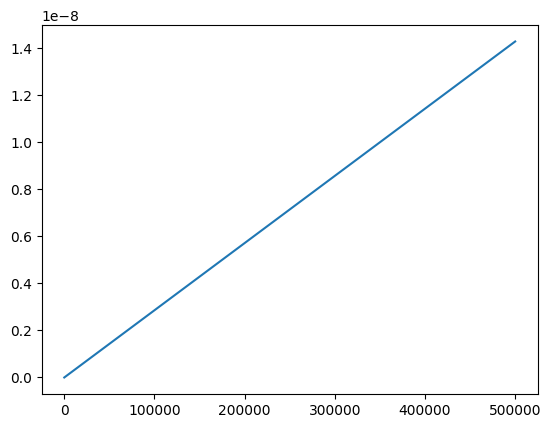

In [42]:
import matplotlib.pyplot as plt
f_val = np.linspace(0,500000,1000)
VCval = []
for fv in f_val:
  VCval.append((VCJW_funct(fv,1e-9,220e-6,20)))
plt.plot(f_val,VCval)